| <h1> Assignment 7.1 : Classifications and Regression </h1> | <h1> Advanced Data Analytics and Machine Learning </h1> |
|--- | --- |
Name: Nicolas, Sean Julian S.<br>
Course and Section: CPE019S3 <br>
Instructor: Engr. Roman Richard <br>
Date Performed: April 7, 2024 <br>
Date Submitted: April 11, 2024 <br>

<hr>







## Import Libraries

In [ ]:
!pip install ucimlrepo
!pip install scikeras

In [ ]:
import numpy as np
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sn
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

### Classification Problem

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X_aca = predict_students_dropout_and_academic_success.data.features
y_aca = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [ ]:
X_aca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
y_aca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


In [ ]:
X_aca.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
y_aca.head(20)

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
5,Graduate
6,Graduate
7,Dropout
8,Graduate
9,Dropout


In [ ]:
X_aca.shape

(4424, 36)

In [ ]:
y_aca.shape

(4424, 1)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
y_aca.loc[:, 'Target'] = label_encoder.fit_transform(y_aca['Target'])

In [ ]:
y_aca.head(20)

,Target
0,0
1,2
2,0
3,2
4,2
5,2
6,2
7,0
8,2
9,0


In [ ]:
y_aca = y_aca.astype(int)

In [ ]:
X_aca_train, X_aca_test, y_aca_train, y_aca_test = train_test_split(X_aca, y_aca, test_size=0.20, random_state=42)

In [ ]:
normalizer = StandardScaler()
X_aca_train_norm = normalizer.fit_transform(X_aca_train)
X_aca_test_norm = normalizer.transform(X_aca_test)

In [ ]:
y_aca_train = y_aca_train.astype(int)

In [ ]:
y_aca_test = y_aca_test.astype(int)

#### Base Model

In [ ]:
def base_aca_model():

  model_aca  = Sequential([
    Dense(35, input_shape=(36,), activation="relu"),
    Dense(100, activation="relu"),
    Dense(3, activation="sigmoid")
  ])

  model_aca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model_aca

aca_base_model = base_aca_model()

aca_base_model.summary()

Model: "sequential_182"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_648 (Dense)           (None, 35)                1295      
                                                                 
 dense_649 (Dense)           (None, 100)               3600      
                                                                 
 dense_650 (Dense)           (None, 3)                 303       
                                                                 
Total params: 5198 (20.30 KB)
Trainable params: 5198 (20.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_aca = aca_base_model.fit(X_aca_train_norm, y_aca_train, epochs=20, batch_size=200, validation_split=0.2)
history_aca.history.keys()

Epoch 1/20
15/15 [==============================] - 1s 18ms/step - loss: 1.0561 - accuracy: 0.5087 - val_loss: 0.9393 - val_accuracy: 0.6201
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.8703 - accuracy: 0.6531 - val_loss: 0.8290 - val_accuracy: 0.6836
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.7719 - accuracy: 0.6892 - val_loss: 0.7554 - val_accuracy: 0.7133
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.7016 - accuracy: 0.7125 - val_loss: 0.7045 - val_accuracy: 0.7260
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6522 - accuracy: 0.7361 - val_loss: 0.6702 - val_accuracy: 0.7274
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6191 - accuracy: 0.7524 - val_loss: 0.6508 - val_accuracy: 0.7345
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.5939 - accuracy: 0.7584 - val_loss: 0.6394 - val_accuracy: 0.7345
Epoch 8/20
15/15 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

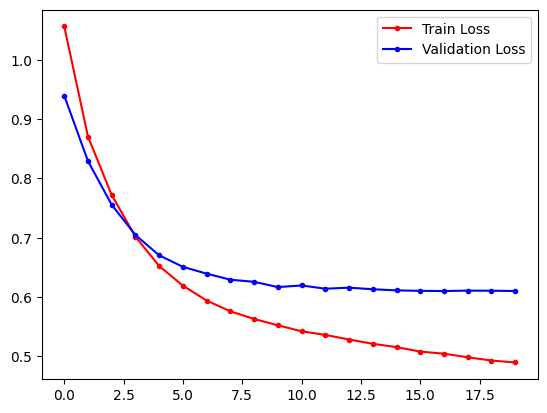

In [ ]:
fig, ax = plt.subplots()
ax.plot(history_aca.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(history_aca.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

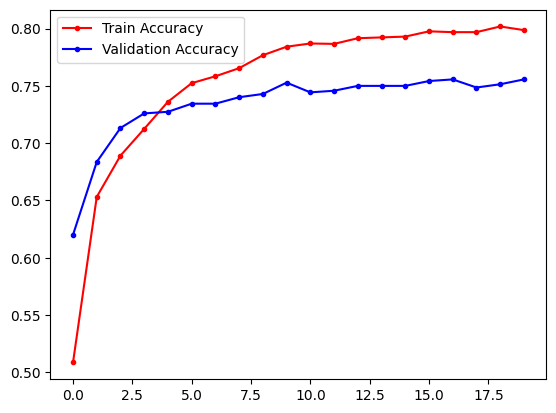

In [ ]:
fig, ax = plt.subplots()
ax.plot(history_aca.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(history_aca.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
results_aca = aca_base_model.evaluate(X_aca_test_norm, y_aca_test)
print('test loss, test acc:', results_aca)

28/28 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.7514
test loss, test acc: [0.6254379153251648, 0.7514124512672424]


In [ ]:
estimators = [('standardize', StandardScaler()), ('mlp', KerasClassifier(model = base_aca_model, epochs=30, verbose = 0))]
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results_base_aca = cross_val_score(pipeline, X = X_aca, y = y_aca, cv=kfold, scoring='accuracy')
print("Base Model: %.4f Accuracy" % (results_base_aca.mean()))

Base Model: 0.7475 Accuracy


In [ ]:
keras_clf_aca = KerasClassifier(model = aca_base_model, optimizer="adam", epochs=10, verbose=1)
k_fold_acc_aca = cross_val_score(keras_clf_aca, X_aca_train_norm, y_aca_train, cv=10, scoring="accuracy")

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7878
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7975
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8028
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.8100
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8151
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8126
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8182
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8245
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8283
Epoch 10/10
12/12 [==============================] - 0s 2ms/step
Epoch 1/10
100/100 [===============

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 0.5284 - accuracy: 0.7862
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7981
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8078
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8160
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8179
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.8198
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8276
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8283
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8283
Epoch 10/10
12/12 [==============================] - 0s 2ms/step
Epoch 1/10
100/100 [===============

#### New Model

In [ ]:
def new_aca_model():

  model_aca  = Sequential([
    Dense(35, input_shape=(36,), activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(3, activation="sigmoid")
  ])

  model_aca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model_aca

aca_new_model = new_aca_model()

aca_new_model.summary()




Model: "sequential_193"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_681 (Dense)           (None, 35)                1295      
                                                                 
 dense_682 (Dense)           (None, 100)               3600      
                                                                 
 dense_683 (Dense)           (None, 100)               10100     
                                                                 
 dense_684 (Dense)           (None, 3)                 303       
                                                                 
Total params: 15298 (59.76 KB)
Trainable params: 15298 (59.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
new_history_aca = aca_new_model.fit(X_aca_train_norm, y_aca_train, epochs=20, batch_size=200, validation_split=0.2)
new_history_aca.history.keys()

Epoch 1/20
15/15 [==============================] - 2s 24ms/step - loss: 0.9981 - accuracy: 0.5599 - val_loss: 0.8927 - val_accuracy: 0.6709
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 0.8207 - accuracy: 0.6849 - val_loss: 0.7372 - val_accuracy: 0.7076
Epoch 3/20
15/15 [==============================] - 0s 7ms/step - loss: 0.7025 - accuracy: 0.7171 - val_loss: 0.6608 - val_accuracy: 0.7359
Epoch 4/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6395 - accuracy: 0.7368 - val_loss: 0.6350 - val_accuracy: 0.7387
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6026 - accuracy: 0.7542 - val_loss: 0.6258 - val_accuracy: 0.7373
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.5776 - accuracy: 0.7619 - val_loss: 0.6082 - val_accuracy: 0.7444
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.5585 - accuracy: 0.7785 - val_loss: 0.6051 - val_accuracy: 0.7415
Epoch 8/20
15/15 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

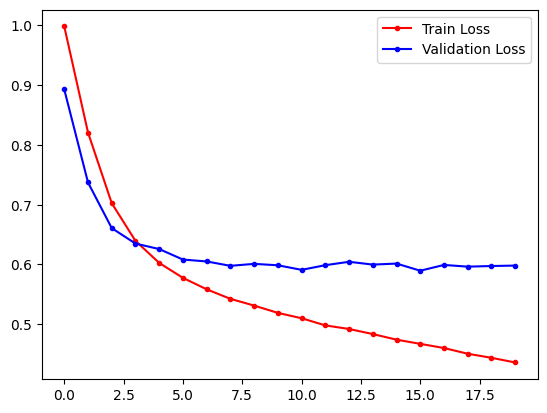

In [ ]:
fig, ax = plt.subplots()
ax.plot(new_history_aca.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(new_history_aca.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

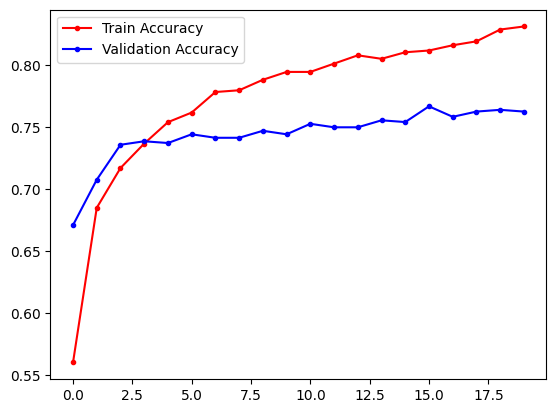

In [ ]:
fig, ax = plt.subplots()
ax.plot(new_history_aca.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(new_history_aca.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
results_aca = aca_new_model.evaluate(X_aca_test_norm, y_aca_test)
print('test loss, test acc:', results_aca)

28/28 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.7492
test loss, test acc: [0.6635545492172241, 0.7491525411605835]


In [ ]:
estimators = [('standardize', StandardScaler()), ('mlp', KerasClassifier(model = new_aca_model, epochs=30, verbose = 0))]
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results_new_aca = cross_val_score(pipeline, X = X_aca, y = y_aca, cv=kfold, scoring='accuracy')
print("New Model: %.4f Accuracy" % (results_new_aca.mean()))

New Model: 0.7319 Accuracy


### Regression Problem

In [ ]:

# fetch dataset
steel_industry_energy_consumption = fetch_ucirepo(id=851)

# data (as pandas dataframes)
X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

# metadata
print(steel_industry_energy_consumption.metadata)

# variable information
print(steel_industry_energy_consumption.variables)


{'uci_id': 851, 'name': 'Steel Industry Energy Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/851/data.csv', 'abstract': 'The data is collected from a smart small-scale steel industry in South Korea.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 35040, 'num_features': 9, 'feature_types': ['Real', 'Categorical'], 'demographics': [], 'target_col': ['Load_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2021, 'last_updated': 'Mon Aug 14 2023', 'dataset_doi': '10.24432/C52G8C', 'creators': ['Sathishkumar V E', 'Changsun Shin', 'Yongyun Cho'], 'intro_paper': {'title': 'Efficient energy consumption prediction model for a data analytic-enabled industry building in a smart city', 'authors': 'Sathishkumar V E, Changsun Shin, Yongyun Cho', 'published

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Load_Type  35040 non-null  object
dtypes: object(1)
memory usage: 273.9+ KB


In [ ]:
X.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday


In [ ]:
y.head()

,Load_Type
0,Light_Load
1,Light_Load
2,Light_Load
3,Light_Load
4,Light_Load


In [ ]:
X = X.drop(['Day_of_week'], axis=1)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
X.loc[:, 'WeekStatus'] = label_encoder.fit_transform(X['WeekStatus'])
y.loc[:, 'Load_Type'] = label_encoder.fit_transform(y['Load_Type'])

In [ ]:
y = y.astype(int)
X = X.astype(float)

In [ ]:
X.head(200)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0
...,...,...,...,...,...,...,...,...
195,4.57,4.61,0.0,0.0,70.40,100.0,3600,0
196,4.64,4.46,0.0,0.0,72.10,100.0,4500,0
197,4.64,4.57,0.0,0.0,71.25,100.0,5400,0
198,4.61,4.79,0.0,0.0,69.34,100.0,6300,0


In [ ]:
X.shape

(35040, 8)

In [ ]:
y.shape

(35040, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
def base_reg_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(8,), activation="relu"))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
basereg_model = base_reg_model()

In [ ]:
base_reg_model = basereg_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
876/876 [==============================] - 2s 2ms/step - loss: 1278.9709
Epoch 2/10
876/876 [==============================] - 1s 2ms/step - loss: 30.5087
Epoch 3/10
876/876 [==============================] - 2s 2ms/step - loss: 133.1391
Epoch 4/10
876/876 [==============================] - 2s 3ms/step - loss: 328.5690
Epoch 5/10
876/876 [==============================] - 1s 2ms/step - loss: 176.1179
Epoch 6/10
876/876 [==============================] - 2s 2ms/step - loss: 46.7637
Epoch 7/10
876/876 [==============================] - 1s 2ms/step - loss: 174.1422
Epoch 8/10
876/876 [==============================] - 1s 2ms/step - loss: 79.2428
Epoch 9/10
876/876 [==============================] - 1s 2ms/step - loss: 537.0556
Epoch 10/10
876/876 [==============================] - 1s 2ms/step - loss: 1.8779


In [ ]:
estimator1 = KerasRegressor(model =basereg_model, epochs=30, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator1, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -5.38 (11.97) MSE


In [ ]:
reg_model_base.evaluate(X_test, y_test)

219/219 [==============================] - 1s 3ms/step - loss: 311617408.0000


311617408.0

In [ ]:
def new_reg_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(8,), activation="relu"))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
reg_model_new = new_reg_model()
regmod_new = reg_model_new.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
686/701 [============================>.] - ETA: 0s - loss: 289544.8438

701/701 [==============================] - 7s 8ms/step - loss: 283437.9688 - val_loss: 22.6404
Epoch 2/20
701/701 [==============================] - 2s 2ms/step - loss: 13.1890 - val_loss: 16.1363
Epoch 3/20
701/701 [==============================] - 3s 4ms/step - loss: 4.0074 - val_loss: 2.0815
Epoch 4/20
701/701 [==============================] - 2s 2ms/step - loss: 2.1013 - val_loss: 1.2739
Epoch 5/20
701/701 [==============================] - 2s 2ms/step - loss: 1.7158 - val_loss: 1.1509
Epoch 6/20
701/701 [==============================] - 2s 2ms/step - loss: 2.2221 - val_loss: 0.5890
Epoch 7/20
701/701 [==============================] - 2s 2ms/step - loss: 4.8572 - val_loss: 1.0536
Epoch 8/20
701/701 [==============================] - 2s 2ms/step - loss: 14.9468 - val_loss: 210.6301
Epoch 9/20
701/701 [==============================] - 2s 2ms/step - loss: 933.0128 - val_loss: 562.3677
Epoch 10/20
701/701 [==============================] - 2s 3ms/step - loss: 4127.4033 - val_loss:

In [ ]:
reg_model_new.evaluate(X_test, y_test)

219/219 [==============================] - 2s 8ms/step - loss: 1.9835


1.9834835529327393

In [ ]:
estimator = KerasRegressor(model = reg_model_new, epochs=10, batch_size=32, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -688.02 (1706.83) MSE


In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=reg_model_new, epochs=50, batch_size=200, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.25 (0.03) MSE


#### Conclusion
- In this assignment I was able to create base models for both classification and regression problems. This gave me an oppotunity to make another model that will improve its accuracy by tweaking he number of hidden layers and neurons in the model. Using K-fold, I was able to evaluate the models that I created and compare the results between the base model and the new model. Although, I observed that adding additional hidden layers in my classification problem actaully decreased it accuracy.